In [42]:
import sys
sys.path.append("../")

from config import Config
conf = Config()

from langchain.embeddings import init_embeddings
from langgraph.store.memory import InMemoryStore

from typing import Optional 
from langchain.chat_models import init_chat_model
from langgraph.store.base import BaseStore
from langgraph.graph import START, MessagesState, StateGraph

######### ENV #########
from dotenv import load_dotenv

import pickle

load_dotenv()





True

In [43]:
embeddings = init_embeddings('openai: text-embedding-3-small')

store = InMemoryStore(
    index = {"embed": embeddings,
    "dim" : 1536}
)

namespace = ("user_1", "memories")


llm = init_chat_model("openai:gpt-4o")

In [ ]:
def chat(state, *, store:BaseStore):
    msg = state["messages"][-1]
    print(f"My message or my query {msg}")

    update_key=1
    if list(store._data.values()) != []:
        update_key = int(list(list(store._data.values())[0].keys())[-1]) + 1

    print(update_key)

    store.put(namespace, update_key, {"text": msg.content})

    items = store.search(namespace, query=msg.content, limit=5)
    memories = "\n".join(item.value['text'] for item in items)
    print(memories)
    memories_prompt = f" ## Memories of user \n{memories}" if memories else ""
    response = llm.invoke(
        [
            {"role": "system",
            "content" : f" You are a helpful assistant. \n{memories_prompt}"},
            *state["messages"]
        ]
    )

    return {"messages" : [response]}

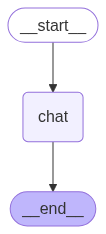

In [45]:
builder = StateGraph(MessagesState)
builder.add_node(chat)
builder.add_edge(START, "chat")
graph  = builder.compile(store=store)
graph

In [46]:
graph.invoke(input = {"messages": [{"role": "user", "content" : "remember my name is Siddharth"}]})

My message or my query content='remember my name is Siddharth' additional_kwargs={} response_metadata={} id='ae55198e-2389-4e1c-874b-3ca9618d7c11'
1
remember my name is Siddharth


{'messages': [HumanMessage(content='remember my name is Siddharth', additional_kwargs={}, response_metadata={}, id='ae55198e-2389-4e1c-874b-3ca9618d7c11'),
  AIMessage(content='Got it! Your name is Siddharth. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 37, 'total_tokens': 54, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BivPm4OhPQxvBDvUxZvVY7S5GiJwv', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--fde6eea5-1fbf-471e-939e-7679c59ca2ce-0', usage_metadata={'input_tokens': 37, 'output_tokens': 17, 'total_tokens': 54, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reaso

In [47]:
graph.invoke(input = {"messages": [{"role": "user", "content" : "also remember I am data scientist!"}]})

My message or my query content='also remember I am data scientist!' additional_kwargs={} response_metadata={} id='11f34a3d-6ffa-41e9-a3d2-00f2201e4dce'
2
also remember I am data scientist!
remember my name is Siddharth


{'messages': [HumanMessage(content='also remember I am data scientist!', additional_kwargs={}, response_metadata={}, id='11f34a3d-6ffa-41e9-a3d2-00f2201e4dce'),
  AIMessage(content="Got it! I'll remember that you're a data scientist. Is there anything else you'd like me to know?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 44, 'total_tokens': 65, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BivPrH7V8lXJgCDbiHekcILg65WEl', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5c495427-c618-4585-b241-9b4dbdfc39ca-0', usage_metadata={'input_tokens': 44, 'output_tokens': 21, 'total_tokens': 65, 'input_token_details': {'audio': 0, 'cache_read': 0}, 

In [48]:
# def save_object(obj, filename):
#     with open(filename, 'wb') as outp:
#         pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)


In [49]:
# save_object(store, '../save_local/long_term_memory_store.pkl')

In [50]:
store1 = InMemoryStore(
    index = {"embed": embeddings,
    "dim" : 1536}
)

In [51]:
store1._data.update(store._data)

In [52]:
store1._data

defaultdict(dict,
            {('user_1',
              'memories'): {'1': Item(namespace=['user_1', 'memories'], key='1', value={'text': 'remember my name is Siddharth'}, created_at='2025-06-16T04:07:14.080809+00:00', updated_at='2025-06-16T04:07:14.080813+00:00'), '2': Item(namespace=['user_1', 'memories'], key='2', value={'text': 'also remember I am data scientist!'}, created_at='2025-06-16T04:07:19.454251+00:00', updated_at='2025-06-16T04:07:19.454259+00:00')}})

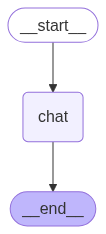

In [53]:
builder = StateGraph(MessagesState)
builder.add_node(chat)
builder.add_edge(START, "chat")
graph  = builder.compile(store=store1)
graph

In [54]:
graph.invoke(input = {"messages": [{"role": "user", "content" : "also remember I work at JPMorgan!"}]})

My message or my query content='also remember I work at JPMorgan!' additional_kwargs={} response_metadata={} id='9337927a-81e7-450b-b47c-a092a70eecbb'
3
also remember I work at JPMorgan!
remember my name is Siddharth
also remember I am data scientist!


{'messages': [HumanMessage(content='also remember I work at JPMorgan!', additional_kwargs={}, response_metadata={}, id='9337927a-81e7-450b-b47c-a092a70eecbb'),
  AIMessage(content="Got it, I already have that remembered! If there's anything else you'd like me to keep in mind, let me know.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 54, 'total_tokens': 79, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BivQ9jZpNBuB5pq6qMGw5IVls5wgx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--92a9e329-8ecf-4424-aaec-9b30d5dcfd76-0', usage_metadata={'input_tokens': 54, 'output_tokens': 25, 'total_tokens': 79, 'input_token_details': {'audio': 0, 'cache_r